In [1]:
# import dependencies
# import sys
# !{sys.executable} -m pip install --user install tensorflow==2.8.0. 

from PIL import Image
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glacierml as gl
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
import seaborn as sns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', None)

tf.random.set_seed(42)

print('currently running tensorflow version: ' + tf.__version__)
# RGI.to_csv('Farinotti_mean_thickness_RGI_ID.csv')


currently running tensorflow version: 2.8.0


In [2]:
predictions = gl.predictions_finder()
predictions = predictions.reset_index()
predictions = predictions.drop('index', axis = 1)

df = pd.DataFrame(columns = {
        'RGIId','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
})

for index in tqdm(predictions.index):
    idx = index
#     print(idx)

    training_module =  predictions['coregistration'].iloc[idx]
    architecture = predictions['architecture'].iloc[idx]
    learning_rate = predictions['learning rate'].iloc[idx]
    epochs = '2000'
    df_glob = gl.global_predictions_loader(
        training_module = training_module,
        architecture = architecture,
        learning_rate = learning_rate,
        epochs = epochs

    )
    

    df = pd.concat([df,df_glob])

df = df[[
        'RGIId','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
]]

compiled_raw = df.groupby('RGIId')[
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
]

dft = pd.DataFrame()
for this_rgi_id, obj in tqdm(compiled_raw):
    rgi_id = pd.Series(this_rgi_id, name = 'RGIId')
#     print(f"Data associated with RGI_ID = {this_rgi_id}:")
#     print(this_rgi_id)
#     break
    dft = pd.concat([dft, rgi_id])
    dft = dft.reset_index()
    dft = dft.drop('index', axis = 1)
    dft.loc[dft.index[-1], 'Mean Thickness'] = obj[[
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]].mean().mean()
    dft.loc[dft.index[-1],'Thickness Std Dev'] = obj[[
        '0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
        '11','12','13','14','15','16','17','18','19','20','21',
        '22','23','24',
    ]].stack().std()
    
dft = dft.rename(columns = {
    0:'RGIId'
})
dft

100%|██████████| 161/161 [12:19<00:00,  4.59s/it]
/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/ipykernel_launcher.py:37: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
100%|██████████| 216459/216459 [32:48<00:00, 109.98it/s]


,RGIId,Mean Thickness,Thickness Std Dev
0,RGI60-01.00001,14.840942,7.197743
1,RGI60-01.00002,35.318354,5.178314
2,RGI60-01.00003,33.069360,4.846715
3,RGI60-01.00004,40.320388,5.175665
4,RGI60-01.00005,42.106429,5.433712
...,...,...,...
216454,RGI60-19.02748,26.793757,13.271253
216455,RGI60-19.02749,37.226612,14.775759
216456,RGI60-19.02750,73.351353,21.894920
216457,RGI60-19.02751,90.856097,25.404969


In [ ]:
predictions = gl.predictions_finder()
predictions = predictions.reset_index()
predictions = predictions.drop('index', axis = 1)
predictions.sort_values('predicted volume')

In [ ]:
predictions[predictions['architecture'] == '16-10']

In [ ]:
idx = 122
training_module =  predictions['coregistration'].iloc[idx]
architecture = '_' + predictions['architecture'].iloc[idx]
learning_rate = predictions['learning rate'].iloc[idx]
epochs = '2000'
df_glob = gl.global_predictions_loader(
    training_module = training_module,
    architecture = architecture,
    learning_rate = learning_rate,
    epochs = epochs
    
)
df_reg = gl.regional_predictions_loader(
    training_module = training_module,
    architecture = architecture,
    learning_rate = learning_rate,
    epochs = epochs
    
)

gl.glathida_stats_adder(
    df_reg,
#     pth_1 = '/home/simonhans/data/prethicktor/regional_data/raw/',
#     pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/',
#     pth_3 = '/home/simonhans/data/prethicktor/regional_data/training_data/',
)
df_reg

df_glob
df = df_glob[[
    'avg predicted thickness','0', '1', '2', '3', '4', '5', '6', '7', '8', '9','10',
    '11','12','13','14','15','16','17','18','19','20','21',
    '22','23','24',
]]

In [4]:
ref = pd.read_csv('reference_thicknesses/Farinotti_mean_thickness_RGI_ID_2.csv')
ref = ref[[
    'RGIId',
    'Farinotti Mean Thickness'
]]
ref['region'] = ref['RGIId'].str[6:8]
ref = ref.sort_values('RGIId')
ref = ref.dropna()

RGI = gl.RGI_loader()
RGI = RGI[[
    'RGIId',
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Area',
    'Aspect',
    'Lmax'
]]
# drops = RGI[

# #     (RGI['Aspect'] < 0) | 
#     (RGI['Zmin'] < 0) |
#     (RGI['Zmax'] < 0) |
#     (RGI['Lmax'] < 0) 

# ].index
# RGI = RGI.drop(drops)
RGI['Zdelta'] = RGI['Zmax'] - RGI['Zmin']
# RGI

ref = pd.merge(ref, RGI, on = 'RGIId')

ref = pd.merge(ref, dft, on = 'RGIId')
ref = ref.rename(columns = {
    'Mean Thickness':'Edasi Mean Thickness'
})
ref = ref.reset_index()
ref = ref.drop('index', axis = 1)
ref['VE / VF'] = ref['Edasi Mean Thickness'] / ref['Farinotti Mean Thickness']
ref

,RGIId,Farinotti Mean Thickness,region,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta,Edasi Mean Thickness,Thickness Std Dev,VE / VF
0,RGI60-01.00001,21.182035,01,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,789,14.840942,7.197743,0.700638
1,RGI60-01.00002,30.519478,01,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,431,35.318354,5.178314,1.157240
2,RGI60-01.00003,35.518610,01,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,573,33.069360,4.846715,0.931043
3,RGI60-01.00004,53.077263,01,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,1044,40.320388,5.175665,0.759655
4,RGI60-01.00005,47.519207,01,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,823,42.106429,5.433712,0.886093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215482,RGI60-19.02748,12.948014,19,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,200,26.793757,13.271253,2.069333
215483,RGI60-19.02749,22.894110,19,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,500,37.226612,14.775759,1.626034
215484,RGI60-19.02750,60.874610,19,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,1100,73.351353,21.894920,1.204958
215485,RGI60-19.02751,10.053704,19,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,100,90.856097,25.404969,9.037077


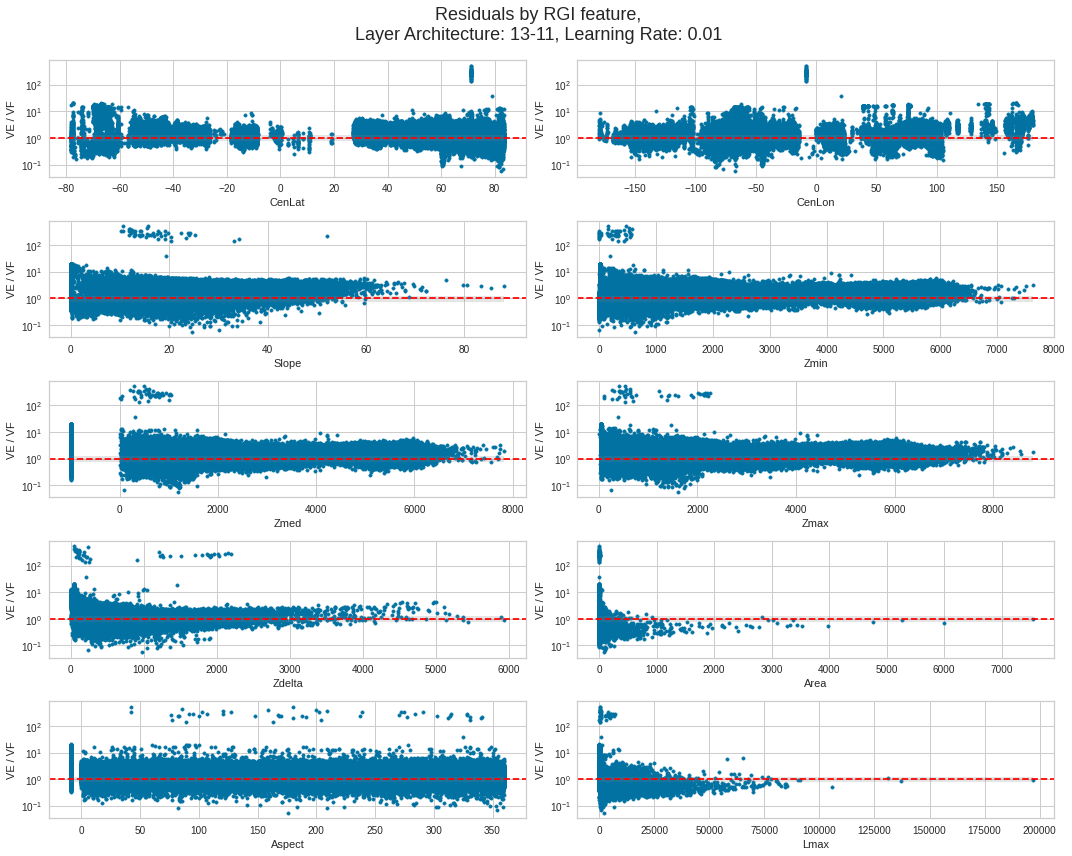

In [5]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Residuals by RGI feature' + 
    ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',

]]
for n, variable in enumerate(dft):
    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('VE / VF')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        ref['VE / VF'],
        marker = '.'
    )
    ax.fill_between(
        x = (
            dft[variable].min(), dft[variable].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

KeyError: "None of [Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',\n       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],\n      dtype='object')] are in the [columns]"

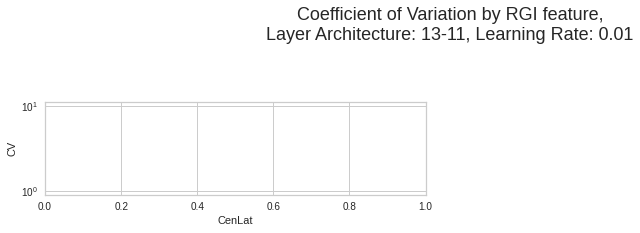

In [6]:
fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Coefficient of Variation by RGI feature' + 
    ',\nLayer Architecture: ' + predictions['architecture'].loc[idx] +
    ', Learning Rate: ' + predictions['learning rate'].loc[idx], fontsize=18, y=0.99)
fig.patch.set_facecolor('w')
dft = ref[[
    'CenLat',
    'CenLon',
    'Slope',
    'Zmin',
    'Zmed',
    'Zmax',
    'Zdelta',
    'Area',
    'Aspect',
    'Lmax',

]]

for n, variable in enumerate(dft):

    ax = plt.subplot(5, 2, n + 1)
    plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel('CV')
    ax.set_xlabel(variable)
    ax.set_yscale('log')
    plt.scatter(
        dft[variable],
        (ref[['0', '1', '2', '3','4','5','6','7','8','9','10',
          '11','12','13','14','15','16','17','18','19','20',
          '21','22','23','24']].std(axis = 1)) / ref[['0', '1', '2', '3','4','5','6','7','8','9','10',
          '11','12','13','14','15','16','17','18','19','20',
          '21','22','23','24']].mean(axis = 1) ,
        marker = '.'
    )
    ax.fill_between(
        x = (
            dft[variable].min(), dft[variable].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')

plt.tight_layout()

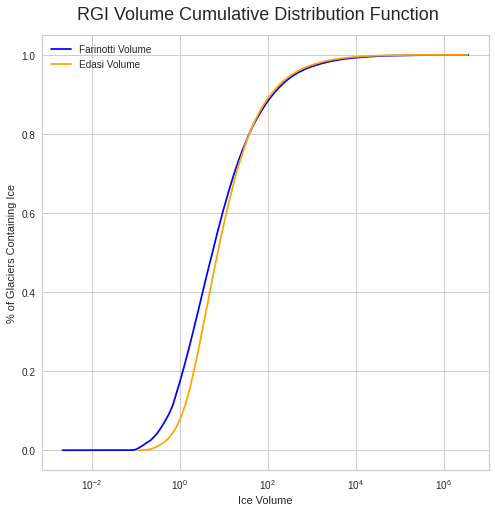

In [20]:
data_1 = ref['Farinotti Mean Thickness'] * ref['Area']
data_2 = ref['Edasi Mean Thickness'] * ref['Area']
#sort data


x_1 = np.sort(data_1)
# x = data_1
#calculate CDF values
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)


x_2 = np.sort(data_2)
# x = data
#calculate CDF values
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

#plot CDF
fig, ax = plt.subplots(1,1,figsize=(8, 8))

plt.subplots_adjust(hspace=0.5)

plt.suptitle('RGI Volume Cumulative Distribution Function', fontsize=18, y=0.93)
fig.patch.set_facecolor('w')


plt.subplots_adjust(hspace=0.5)
plt.plot(
    x_1, 
    y_1,
    c = 'blue',
    label = 'Farinotti Volume'
    
)
plt.plot(
    x_2, 
    y_2,
    c = 'orange',
    label = 'Edasi Volume'
)
plt.legend()
ax.set_xscale('log')
ax.set_xlabel('Ice Volume')
ax.set_ylabel('% of Glaciers Containing Ice')
plt.savefig('figs/cdf/cdf.svg')

219671


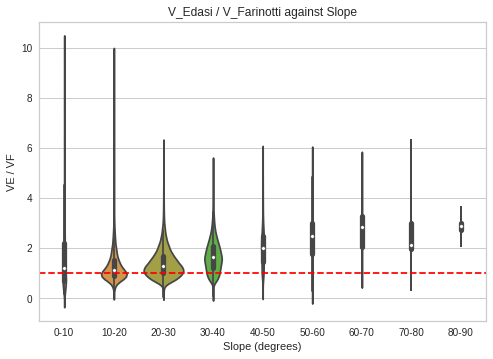

In [21]:
dfr = pd.DataFrame()
for i in range(0, 90, 10):
    dft = ref.loc[(ref['Slope'].between(i, i + 10)) & (ref['VE / VF'] <= 10)]
    dft['Slope (degrees)'] = str(i) + '-' + str(i + 10)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Slope (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count',
    inner = 'box'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('V_Edasi / V_Farinotti against Slope')
print(len(dfr))
plt.savefig('figs/violin/slope.svg')

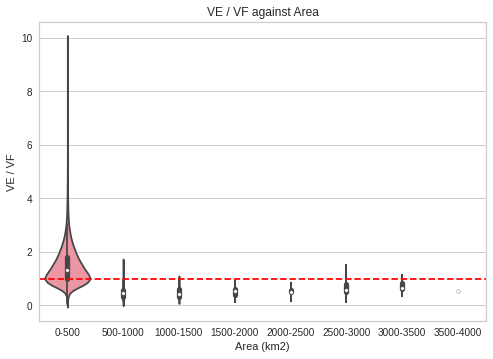

In [9]:
dfr = pd.DataFrame()
for i in range(0, 4000, 500):
    dft = ref.loc[(ref['Area'].between(i, i + 500)) & (ref['VE / VF'] <= 10)]
    dft['Area (km2)'] = str(i) + '-' + str(i + 500)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Area (km2)'],
    y = dfr['VE / VF'],
    inner = 'box',
    scale = 'count',
#     inner = None
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Area')
plt.savefig('figs/violin/area.svg')

Text(0.5, 1.0, 'VE / VF against Lmax (m)')

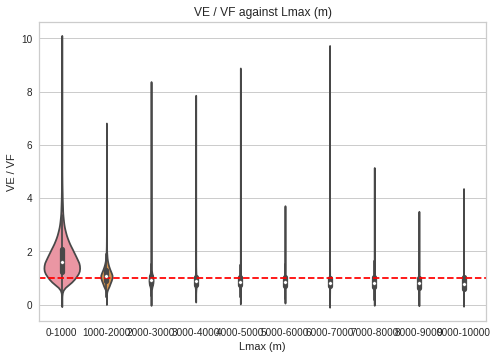

In [10]:
dfr = pd.DataFrame()
for i in range(0, 10000, 1000):
    dft = ref.loc[(ref['Lmax'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Lmax (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Lmax (m)'],
    y = dfr['VE / VF'],
    scale = 'count',
    inner = 'box'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Lmax (m)')

Text(0.5, 1.0, 'VE / VF against Zmin')

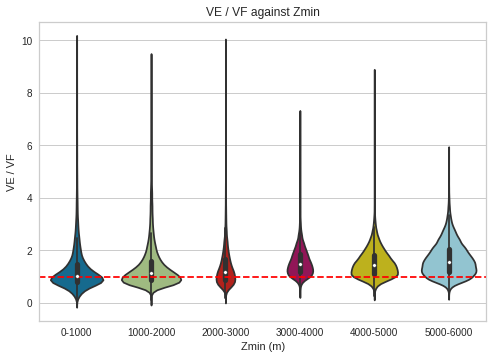

In [11]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmin'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmin (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmin (m)'],
    y = dfr['VE / VF'],
    scale = 'count',
    
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmin')


Text(0.5, 1.0, 'VE / VF against Zmed')

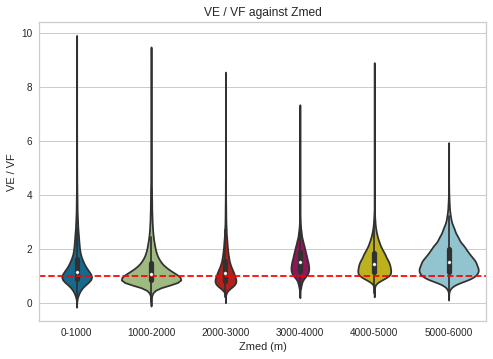

In [12]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmed'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmed (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmed (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmed')

Text(0.5, 1.0, 'VE / VF against Zmax')

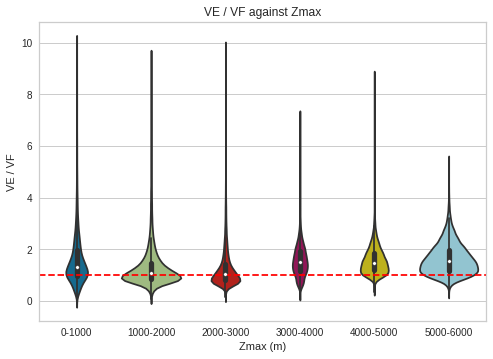

In [13]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zmax'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zmax (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zmax (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zmax')

Text(0.5, 1.0, 'VE / VF against Zdelta')

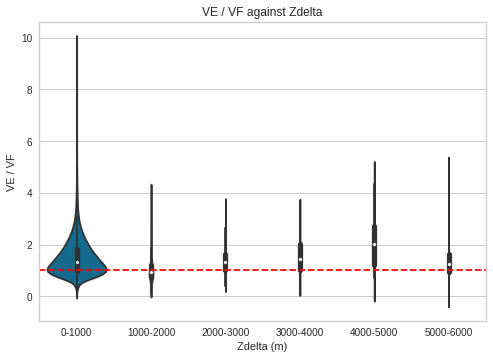

In [14]:
dfr = pd.DataFrame()
for i in range(0, 6000, 1000):
    dft = ref.loc[(ref['Zdelta'].between(i, i + 1000)) & (ref['VE / VF'] <= 10)]
    dft['Zdelta (m)'] = str(i) + '-' + str(i + 1000)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Zdelta (m)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Zdelta')


Text(0.5, 1.0, 'VE / VF against Cent Lat')

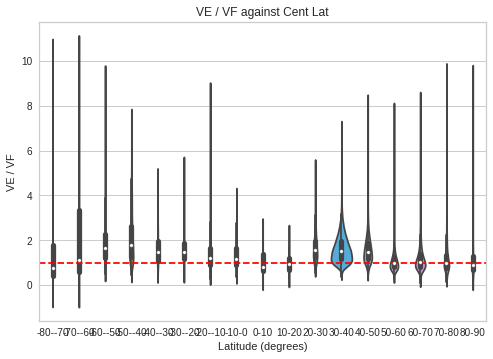

In [15]:
dfr = pd.DataFrame()
for i in range(-90, 100, 10):
    dft = ref.loc[(ref['CenLat'].between(i, i + 10)) & (ref['VE / VF'] <= 10)]
    dft['Latitude (degrees)'] = str(i) + '-' + str(i + 10)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Latitude (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Cent Lat')


Text(0.5, 1.0, 'VE / VF against Cent Lon')

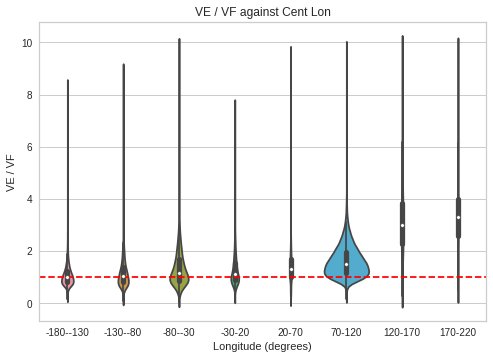

In [16]:
dfr = pd.DataFrame()
for i in range(-180, 190, 50):
    dft = ref.loc[(ref['CenLon'].between(i, i + 50)) & (ref['VE / VF'] <= 10)]
    dft['Longitude (degrees)'] = str(i) + '-' + str(i + 50)
    dfr = pd.concat([dfr, dft])
ax = sns.violinplot(
    x = dfr['Longitude (degrees)'],
    y = dfr['VE / VF'],
    scale = 'count'
#     ax = plt.subplot(1,1,(figsize = (10,10)))
)
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
ax.set_title('VE / VF against Cent Lon')